<a href="https://colab.research.google.com/github/ansaalmns/aisha/blob/main/Inferential_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the requires libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_1samp, shapiro

In [ ]:
# load dataset
grades = pd.read_excel('Marks.xlsx' , sheet_name='Grades', skiprows=2)
grades

,ID,Division,Quiz,Practical,Project,Final,Total
0,H00247,EDU,84.0,67.0,69.6,67.0,NaN
1,H00258,HLT,74.0,68.0,67.0,73.0,282.0
2,H00269,ENG,88.0,86.0,75.6,74.0,NaN
3,H00224,EDU,NaN,71.0,65.8,71.0,NaN
4,H00269,EDU,22.0,65.0,66.8,78.0,NaN
5,H00277,ENG,40.0,68.0,76.4,68.0,NaN
6,H00277,HLT,71.0,NaN,64.6,70.0,NaN
7,H00293,BUS,50.0,74.0,60.6,78.0,NaN
8,H00247,CIS,61.0,70.0,66.4,82.0,NaN
9,H00149,APP,97.0,98.0,85.2,87.0,NaN


In [ ]:
# data cleaning
grades.dropna(how='all', inplace=True)
grades.fillna(0, inplace=True)
grades.head()

,ID,Division,Quiz,Practical,Project,Final
0,H00247,EDU,84.0,67.0,69.6,67.0
1,H00258,HLT,74.0,68.0,67.0,73.0
2,H00269,ENG,88.0,86.0,75.6,74.0
3,H00224,EDU,0.0,71.0,65.8,71.0
4,H00269,EDU,22.0,65.0,66.8,78.0


In [ ]:
# dataset description
print('rows;', grades.shape[0])
print('coloums:', grades.shape[1])
print('coloumn name:', list(grades.columns))

rows; 23
cols: 6
coloumn name: ['ID ', 'Division', 'Quiz', 'Practical', 'Project', 'Final']


<Axes: >

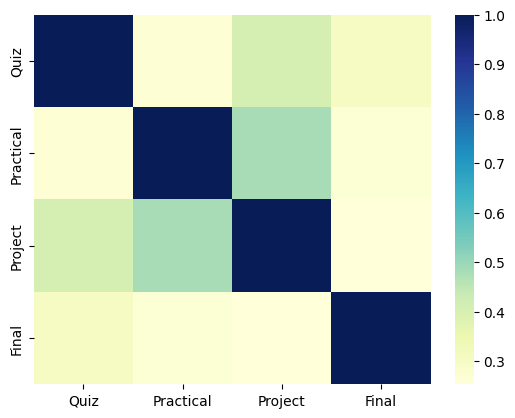

In [ ]:
#calculate the correlation between all numeric variables
grades_corr = grades.iloc[:, 2:].corr()
sns.heatmap(grades_corr, cmap='YlGnBu')

In [ ]:
# calculate pearson coefficient of correlarion
res = pearsonr(grades['Final'], grades['Project'])
res
# if its less than 0.05 there is correlation if its greater than 0.05 there is no correlation

PearsonRResult(statistic=0.25308735794012666, pvalue=0.2439509305251363)

In [ ]:
c#load csv dataset
df = pd.read_csv('ordinal_dataset.csv')
grade_ranking={'A':1, 'B':2, 'C':3, 'D':4, 'F':5} # Convert the ordinal values to numbers
experience_ranking={None:0, 'Beginner':1, 'Intermediate':2, 'Advanced':3} #Convert the experience values to numbers
df['Grade_rank']=df['Grade'].map(grade_ranking)
df['Work_esperience_rank'] = df['Work_Experience'].map(experience_ranking)
df.dropna(subset={'Grade_rank', 'Work_esperience_rank'}, inplace=True)
#Implement the spearman Rho test
r,_ = spearmanr(df['Grade_rank'], df['Work_esperience_rank'])
print(round(r,4))

0.0061


<Axes: >

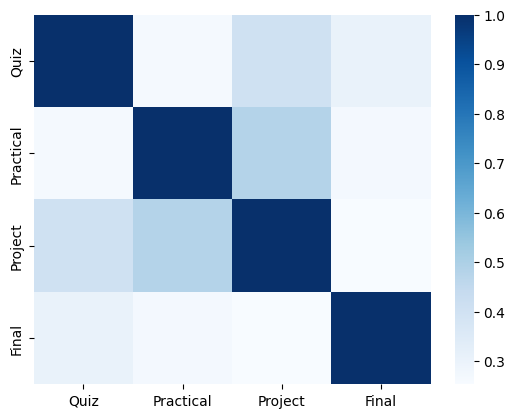

In [ ]:
cr = grades.iloc[:, 2:].corr(method='pearson')
sns.heatmap(cr, cmap='Blues')

In [ ]:
#Checking the correlation between Project and Final grades using pearson test
r, pvalue = pearsonr(grades['Project'], grades['Final']) #calculated the pvalue
print('The statistic: ', r)
print('pvalue: ', pvalue)
print('Degree of freedom:', len(grades)-2)
if(pvalue<0.05):
  print('Conclution: reject null hypothesis: There is correlation between project and final grades')
else:
  print('Conclution: accept null hypothesis: There is no correlation between project and final grades')


The statistic:  0.25308735794012666
pvalue:  0.2439509305251363
Degree of freedom: 21
Conclution: accept null hypothesis: There is no correlation between project and final grades


In [ ]:
#Load loan dataset
loans = pd.read_csv('Loan.csv')

#Create contingency table
contingency_table = pd.crosstab(loans['loan_status'], loans['purpose'])
print('Contingency table:\n', contingency_table)

#Reform Chi-Square Test
stat, pvalue, dof, exp= chi2_contingency(contingency_table)

#Display results
print(f'Chi-square Statictic: {stat}')
print(f'P-Value: {pvalue}')
print(f'Degrees of freedom: {dof}')

#interpretation based on p value
alpha = 0.05
if pvalue < alpha:
  print('Reject the null hypothesis, variables are dependent')
else:
  print('Fail to reject the null hypothesis, variables are independent')

Contingency table:
 purpose      credit_Card  debt_consolidation
loan_status                                 
Charged Off            3                   0
Fully Paid             6                   1
Chi-square Statictic: 0.0
P-Value: 1.0
Degrees of freedom: 1
Fail to reject the null hypothesis, variables are independent


In [ ]:
#Implementation of the T test
stat, pvalue = ttest_1samp(grades['Final'], 75)

#Display results
print(f't-test Statistic:  {stat}')
print(f'P-value: {pvalue}')

#Interpetation based on p value
alpha = 0.05
if pvalue < alpha:
  print('Reject the null hypothesis, final grades average is NOT equal to 75')
else:
  print('Accept the null hypothesis, final grades average is equal to 75')


t-test Statistic:  0.5522616771374428
P-value: 0.5863365108976342
Accept the null hypothesis, final grades average is equal to 75


In [ ]:
#Implementation of the Shaprio test
stat, pvalue = shapiro(grades['Final'])

#Display results
print(f'Shapiro Statitics: {stat}')
print(f'P-Vlaue: {pvalue}')

#Interpretation based on p-value
alpha = 0.05
if pvalue < alpha:
  print('Variable is normal')
else:
  print('Variable is not normal')

Shapiro Statitics: 0.9435715063864146
P-Vlaue: 0.21427928334932583
Variable is not normal
